<a href="https://colab.research.google.com/github/dhanushnayak/gender_age_identification/blob/main/Gender_Identification_with_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Model

## Single input with multiple output

In [3]:
from keras.layers import *

In [4]:
x = Input(shape=(3,))

In [14]:
hidden1 = Dense(128,activation='relu')(x)
hidden2 = Dense(64,activation='relu')(hidden1)

output1 = Dense(1,activation='linear',name='Age')(hidden2)

output2 = Dense(1,activation='sigmoid',name='Place')(hidden2)

In [15]:
model = Model(inputs=x ,outputs=[output1,output2] )

In [16]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 128)          512         ['input_1[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 64)           8256        ['dense_8[0][0]']                
                                                                                                  
 Age (Dense)                    (None, 1)            65          ['dense_9[0][0]']                
                                                                                            

In [13]:
from keras.utils import plot_model

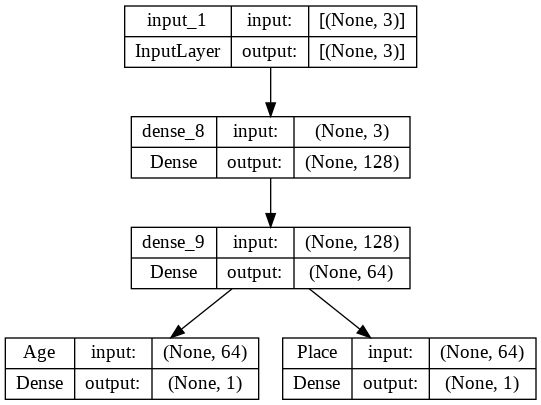

In [19]:
plot_model(model,show_shapes=True)

## Now Multiple input with single output

In [27]:
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

In [28]:
x1= Dense(8, activation='relu')(inputA)
x2= Dense(4,activation='relu')(x1)


In [29]:
y =  Dense(64,activation='relu')(inputB)
y1 = Dense(32,activation='relu')(y)
y2 = Dense(4, activation='relu')(y1)


In [30]:
combined = concatenate([x2,y2])

In [32]:
z = Dense(2,activation='relu')(combined)
z=  Dense(1,activation='linear')(z)

In [33]:
model1 =  Model(inputs=[inputA,inputB],outputs=z)

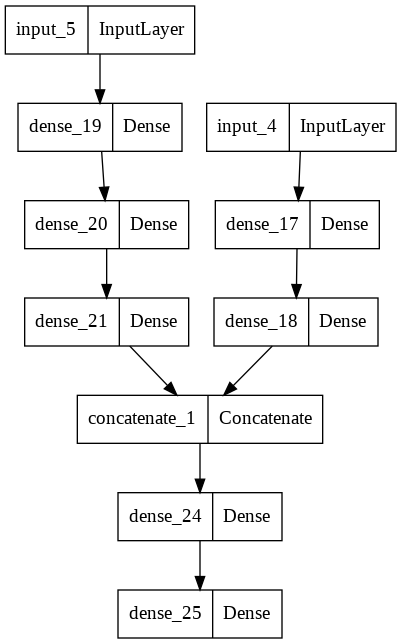

In [34]:
plot_model(model1)

In [35]:
! pip install -q kaggle

In [37]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhanush232","key":"9cfce314261b94019674cac5d6e50f84"}'}

In [38]:
 ! mkdir ~/.kaggle

In [39]:
! cp kaggle.json ~/.kaggle/

In [40]:
! chmod 600 ~/.kaggle/kaggle.json

In [44]:
! kaggle datasets download -d jangedoo/utkface-new

100% 331M/331M [00:03<00:00, 171MB/s]
100% 331M/331M [00:03<00:00, 103MB/s]


In [45]:
import zipfile

zip =  zipfile.ZipFile("/content/utkface-new.zip",'r')
zip.extractall("/content")
zip.close()

In [46]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [47]:
folder_path = "/content/utkface_aligned_cropped/UTKFace"


In [48]:
age = []
gender = []
img_path = []
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)

In [49]:
len(age)

23708

In [50]:
df =  pd.DataFrame({"age":age,"gender":gender,"img":img_path})

In [53]:
df.head()

,age,gender,img
0,32,0,32_0_3_20170119200310531.jpg.chip.jpg
1,80,0,80_0_0_20170117173307368.jpg.chip.jpg
2,47,0,47_0_0_20170104210532204.jpg.chip.jpg
3,10,0,10_0_4_20170103212521420.jpg.chip.jpg
4,95,1,95_1_0_20170110182409918.jpg.chip.jpg


In [52]:
df.shape

(23708, 3)

In [54]:
df = df.sample(frac=1,random_state=0)
train_df = df.iloc[:20000]
test_df = df.iloc[20000:]

In [55]:
train_df.shape

(20000, 3)

In [56]:
test_df.shape

(3708, 3)

In [57]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )

In [58]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [59]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=folder_path,
    x_col = 'img',
    y_col=['age','gender'],
    target_size = (200,200),
    class_mode='multi_output'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=folder_path,
    x_col='img',
    y_col=['age','gender'],
    target_size = (200,200),
    class_mode='multi_output'
)

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [60]:
from keras.applications.vgg16 import VGG16


In [61]:
vggnet = VGG16(include_top=False, input_shape=(200,200,3))

58889256/58889256 [==============================] - 0s 0us/step


In [62]:
vggnet.trainable = False

output = vggnet.layers[-1].output

flatten= Flatten()(output)


dense1 = Dense(512,activation='relu')(flatten)
dense2 = Dense(512,activation='relu')(flatten)

dense3 = Dense(512,activation='relu')(dense1)
dense4 = Dense(512,activation='relu')(dense2)

output1 = Dense(1,activation='linear',name='age')(dense3)
output2 = Dense(1,activation='sigmoid',name='gender')(dense4)

model = Model(inputs=vggnet.input,outputs=[output1,output2])

In [63]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 200, 200, 64  1792        ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 200, 200, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

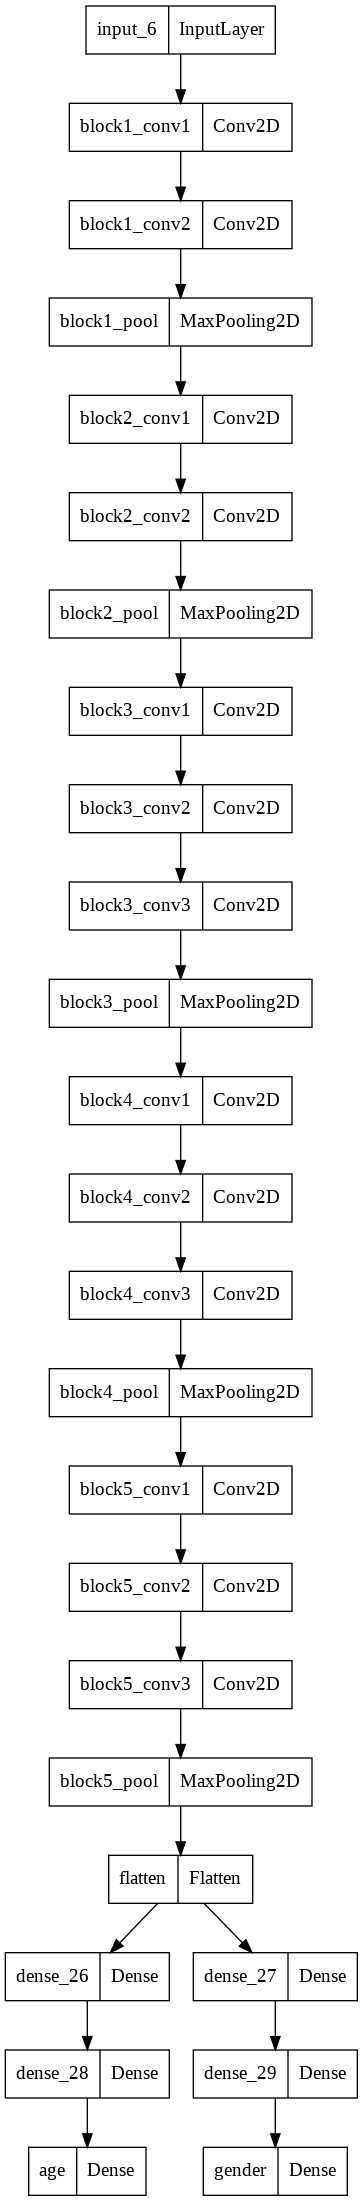

In [64]:
plot_model(model)

In [65]:
model.compile(optimizer='adam',loss={"age":"mae","gender":"binary_crossentropy"},metrics={"age":"mae","gender":"accuracy"},loss_weights={"age":1,'gender':99})

In [66]:
model.fit(train_generator,batch_size=32,epochs=10,validation_data=test_generator)

Epoch 1/10
625/625 [==============================] - 219s 333ms/step - loss: 63.8182 - age_loss: 10.8164 - gender_loss: 0.5354 - age_mae: 10.8164 - gender_accuracy: 0.7372 - val_loss: 50.1258 - val_age_loss: 8.5577 - val_gender_loss: 0.4199 - val_age_mae: 8.5577 - val_gender_accuracy: 0.8034
Epoch 2/10
625/625 [==============================] - 205s 327ms/step - loss: 52.4900 - age_loss: 9.4168 - gender_loss: 0.4351 - age_mae: 9.4168 - gender_accuracy: 0.7927 - val_loss: 42.6257 - val_age_loss: 8.1930 - val_gender_loss: 0.3478 - val_age_mae: 8.1930 - val_gender_accuracy: 0.8474
Epoch 3/10
625/625 [==============================] - 204s 326ms/step - loss: 49.6387 - age_loss: 9.0342 - gender_loss: 0.4101 - age_mae: 9.0342 - gender_accuracy: 0.8075 - val_loss: 40.5727 - val_age_loss: 8.0808 - val_gender_loss: 0.3282 - val_age_mae: 8.0808 - val_gender_accuracy: 0.8568
Epoch 4/10
625/625 [==============================] - 204s 326ms/step - loss: 49.2110 - age_loss: 8.7909 - gender_loss: 0.

In [67]:
import matplotlib.pyplot as plt
img = plt.imread('/content/rc.jpg')

In [68]:
img.shape

(168, 300, 3)

In [70]:
from skimage.transform import resize
img = resize(img,(200,200,3))

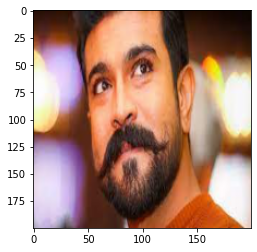

In [71]:
plt.imshow(img)

In [73]:
img.shape

(200, 200, 3)

In [75]:
res=model.predict(np.array([img]))

1/1 [==============================] - 0s 20ms/step


In [77]:
len(res)

2

In [81]:
print(f'Age = {round(res[0][0][0],0)}')

Age = 35.0


In [87]:
print(f'Gender = {"mail" if round(res[1][0][0],0)==0 else "Female"}')

Gender = mail
